In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "C:\\Users\\91949\\Desktop\\data science"
CHAPTER_ID = "linearmodels"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x=2*np.random.rand(100,1) 
y=4+3*x+np.random.randn(100,1)


[0, 2, 0, 15]

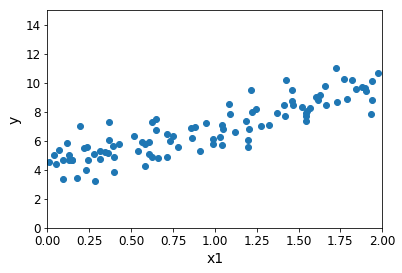

In [4]:
plt.scatter(x,y)
plt.xlabel('x1')
plt.ylabel('y')
plt.axis([0,2,0,15])

In [6]:
#normal equation
x_b=np.c_[np.ones((100,1)),x]


In [7]:
# best value of theta to mimimize cost function or mse
#we uses np.linalg.inv to inverse the matrix
#.dot() method uses for multiplication
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot (y)

In [8]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [9]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]  # add x0 = 1 to each instance
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

In [10]:
x_new

array([[0],
       [2]])

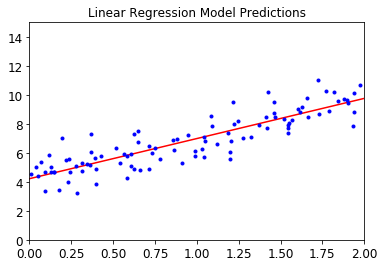

In [11]:
plt.plot(x_new,y_predict,"r-") 
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.title('Linear Regression Model Predictions')
plt.show()

In [12]:
from sklearn.linear_model   import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
lin_reg.coef_

array([[2.77011339]])

In [14]:
lin_reg.intercept_

array([4.21509616])

In [15]:
lin_reg.predict(x_new)

array([[4.21509616],
       [9.75532293]])

In [16]:
x.shape

(100, 1)

In [17]:
x_new

array([[0],
       [2]])

# GRADIENT DESCENT

1.its a very generic optimization algorithm capable of finding optimal solution to a widw range of problems

2. general idea is TWEAK PARAMETERS ITERATIVELY IN ORDER TO MINIMIZE A COST FUNCTION

3.When	using	Gradient	Descent,	you	should	ensure	that	all	features	have	a	similar	scale	(e.g.,	using	Scikit-Learn’s	StandardScaler class),	or	else	it	will	take	much	longer	to	converge.


4.Concretely,	you	start	by	filling	θ	with	random	values	(this	is	called	random	initialization),	and	then	you improve	it	gradually,	taking	one	baby	step	at	a	time,	each	step	attempting	to	decrease	the	cost	function (e.g.,	the	MSE),	until	the	algorithm	converges	to	a	minimum

5.An	important	parameter	in	Gradient	Descent	is	the	size	of	the	steps,	determined	by	the	learning	rate hyperparameter.	If	the	learning	rate	is	too	small,	then	the	algorithm	will	have	to	go	through	many	iterations to	converge,	which	will	take	a	long	time

6.the	two main	challenges	with	Gradient	Descent:	if	the	random	initialization	starts	the	algorithm	on	the	left,	then	it will	converge	to	a	local	minimum,	which	is	not	as	good	as	the	global	minimum.	If	it	starts	on	the	right, then	it	will	take	a	very	long	time	to	cross	the	plateau,	and	if	you	stop	too	early	you	will	never	reach	the global	minimum.


# Batch	Gradient	Descent 

To	implement	Gradient	Descent,	you	need	to	compute	the	gradient	of	the	cost	function	with	regards	to each	model	parameter	θj.	In	other	words,	you	need	to	calculate	how	much	the	cost	function	will	change	if you	change	θj	just	a	little	bit.	This	is	called	a	'partial	derivative'

Notice	that	this	formula	involves	calculations	over	the	full	training	set	X,	at	each	Gradient	Descent	step!	This	is	why	the	algorithm is	called	Batch	Gradient	Descent:	it	uses	the	whole	batch	of	training	data	at	every	step.	As	a	result	it	is	terribly	slow	on	very large	training	sets	(but	we	will	see	much	faster	Gradient	Descent	algorithms	shortly).	However,	Gradient	Descent	scales	well with	the	number	of	features;	training	a	Linear	Regression	model	when	there	are	hundreds	of	thousands	of	features	is	much	faster using	Gradient	Descent	than	using	the	Normal	Equation.

In [18]:
eta = 0.1#learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)#random initialization

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [19]:
theta

array([[4.21509616],
       [2.77011339]])

In [20]:
x_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [21]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(x_b)
    plt.plot(x, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = x_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(x_new, y_predict, style)
        gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


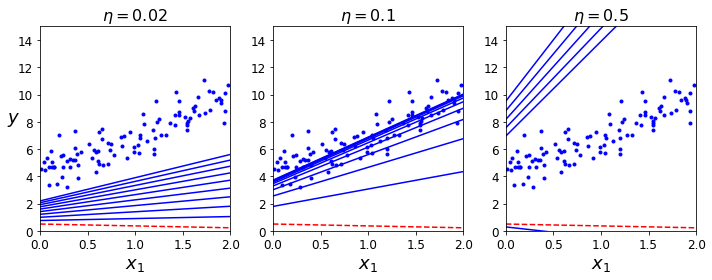

In [22]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

The	main	problem	with	Batch	Gradient	Descent	is	the	fact	that	it	uses	the	whole	training	set	to	compute the	gradients	at	every	step,	which	makes	it	very	slow	when	the	training	set	is	large.

# STOCHASTIC GRADIENT DESCENT

Stochastic	Gradient	Descent	just	picks	a	random	instance	in	the	training	set	at	every	step	and computes	the	gradients	based	only	on	that	single	instance.	Obviously	this	makes	the	algorithm	much	faster since	it	has	very	little	data	to	manipulate	at	every	iteration.	It	also	makes	it	possible	to	train	on	huge training	sets,	since	only	one	instance	needs	to	be	in	memory	at	each	iteration	(SGD	can	be	implemented	as an	out-of-core	algorithm.7) 

due	to	its	stochastic	(i.e.,	random)	nature,	this	algorithm	is	much	less	regular	than	Batch Gradient	Descent:	instead	of	gently	decreasing	until	it	reaches	the	minimum,	the	cost	function	will	bounce up	and down,	decreasing	only	on	average.	Over	time	it	will	end	up	very	close	to	the	minimum,	but	onceit gets	there	it	will	continue	to	bounce	around,	never	settling	down.	So	once	the	algorithm stops,	the	final	parameter	values	are	good,	but	not	optimal

When	the	cost	function	is	very	irregular,	this	can	actually	help	the	algorithm	jump	out	of local	minima,	so	Stochastic	Gradient	Descent	has	a	better	chance	of	finding	the	global	minimum	than Batch	Gradient	Descent	does.

PROBLEM WITH SGD:Therefore	randomness	is	good	to	escape	from	local	optima,	but	bad	because	it	means	that	the	algorithm can	never	settle	at	the	minimum.	

One	solution	to	this	dilemma	is	to	gradually	reduce	the	learning	rate.	The steps	start	out	large	(which	helps	make	quick	progress	and	escape	local	minima),	then	get	smaller	and smaller,	allowing	the	algorithm	to	settle	at	the	global	minimum.	This	process	is	called	simulated annealing,	because	it	resembles	the	process	of	annealing	in	metallurgy	where	molten	metal	is	slowly cooled	down

The	function	that	determines	the	learning	rate	at	each	iteration	is	called	the	learning schedule.	If	the	learning	rate	is	reduced	too	quickly,	you	may	get	stuck	in	a	local	minimum,	or	even	end	up frozen	halfway	to	the	minimum.	If	the	learning	rate	is	reduced	too	slowly,	you	may	jump	around	the minimum	for	a	long	time	and	end	up	with	a	suboptimal	solution	if	you	halt	training	too	early. 

In [23]:
theta_path_sgd = []
m = len(x_b)
np.random.seed(42)

Saving figure sgd_plot


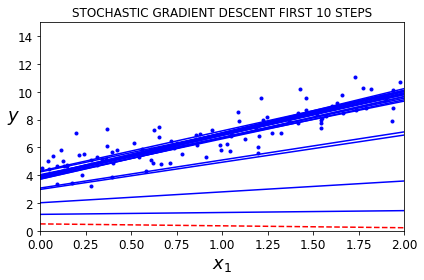

In [24]:
#we r making data into groups (epoch_s) of same size
n_epochs=50
#learning schedule hyperparameters(which determines learning rate at each iteration)
t0=5
t1=50
def learning_schedule(t):
    return t0/(t+t1)
theta=np.random.randn(2,1)#random initialization
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = x_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(x_new, y_predict, style) 
        random_index=np.random.randint(m)
        xi=x_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta- (eta*gradients)
        theta_path_sgd.append(theta)  
plt.plot(x, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18) 
plt.title('STOCHASTIC GRADIENT DESCENT FIRST 10 STEPS')# not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()     


In [25]:
i

99

In [26]:
yi

array([[6.79819647]])

In [27]:
random_index

8

In [28]:
gradients

array([[1.4409106 ],
       [1.73230598]])

In [29]:
eta

0.0009902951079421667

In [30]:
theta

array([[4.21076011],
       [2.74856079]])

In [31]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=50,tol=-np.infty,penalty=None,eta0=0.1)
sgd_reg.fit(x,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [32]:
y.ravel()

array([ 6.33428778,  9.40527849,  8.48372443,  5.60438199,  4.71643995,
        5.29307969,  5.82639572,  8.67878666,  6.79819647,  7.74667842,
        5.03890908, 10.14821022,  8.46489564,  5.7873021 ,  5.18802735,
        6.06907205,  5.12340036,  6.82087644,  6.19956196,  4.28385989,
        7.96723765,  5.09801844,  5.75798135,  5.96358393,  5.32104916,
        8.29041045,  4.85532818,  6.28312936,  7.3932017 ,  4.68275333,
        9.53145501,  5.19772255,  4.64785995,  9.61886731,  7.87502098,
        8.82387021,  5.88791282,  7.0492748 ,  7.91303719,  6.9424623 ,
        4.69751764,  5.80238342,  5.34915394, 10.20785545,  6.34371184,
        7.06574625,  7.27306077,  5.71855706,  7.86711877,  7.29958236,
        8.82697144,  8.08449921,  9.73664501,  8.86548845,  6.03673644,
        9.59980838,  3.4686513 ,  5.64948961,  3.3519395 ,  7.50191639,
        5.54881045,  5.30603267,  9.78594227,  4.90965564,  5.91306699,
        8.56331925,  3.23806212,  8.99781574,  4.70718666, 10.70

In [33]:
sgd_reg.coef_

array([2.79099659])

In [34]:
sgd_reg.intercept_

array([4.23166744])

Note	that	since	instances	are	picked	randomly,	some	instances	may	be	picked	several	times	per	epoch while	others	may	not	be	picked	at	all.	If	you	want	to	be	sure	that	the	algorithm	goes	through	every	instance at	each	epoch,	another	approach	is	to	shuffle	the	training	set,	then	go	through	it	instance	by	instance,	then shuffle	it	again

# Mini-batch	Gradient	Descent

It	is	quite simple	to	understand	once	you	know	Batch	and	Stochastic	Gradient	Descent:	at	each	step,instead	of computing	the	gradients	based	on	the	full	training	set	(as	in	Batch	GD)	or	based	on	just	one	instance	(as	in Stochastic	GD),	Mini-batch	GD	computes	the	gradients	on	small	random	sets	of	instances	called	minibatches.	

The	main	advantage	of	Mini-batch	GD	over	Stochastic	GD	is	that	you	can	get	a	performance boost	from	hardware	optimization	of	matrix	operations,	especially	when	using	GPUs

In [35]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization
#creating learning schedule function which determines learning rate at each step
t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    x_b_shuffled = x_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = x_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [36]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [37]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


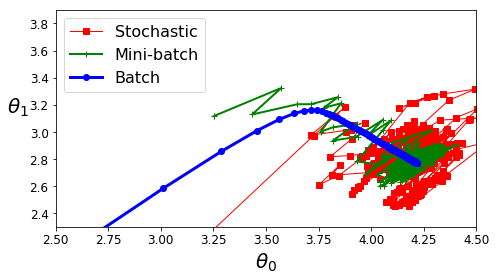

In [38]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

There	is	almost	no	difference	after	training:	all	these	algorithms	end	up	with	very	similar	models	and	make	predictions	in	exactly the	same	way

# Polynomial	Regression 

What	if	your	data	is	actually	more	complex	than	a	simple	straight	line?	Surprisingly,	you	can	actually	use a	linear	model	to	fit	nonlinear	data.	A	simple	way	to	do	this	is	to	add	powers	of	each	feature	as	new features,	then	train	a	linear	model	on	this	extended	set	of	features.	This	technique	is	called	Polynomial Regression. 

In [39]:
m = 100
x= 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)
np.random.seed(42)

Saving figure quadratic_data_plot


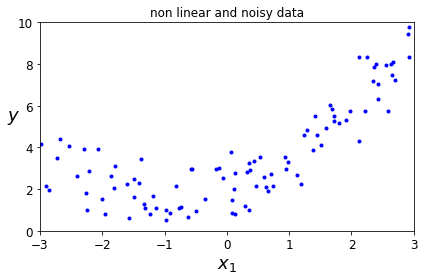

In [40]:
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title('non linear and noisy data')
save_fig("quadratic_data_plot")
plt.show()

Clearly,	a	straight	line	will	never	fit	this	data	properly.	So	let’s	use	Scikit-Learn’s	PolynomialFeatures class	to	transform	our	training	data,	adding	the	square	(2nd-degree	polynomial)	of	each	feature	in	the training	set	as	new	features	

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2)
x_poly=poly_features.fit_transform(x)


In [42]:
x[0]

array([2.38942838])

In [43]:
x_poly[0]

array([1.        , 2.38942838, 5.709368  ])

x_poly has the original feature of x plus the square of its feature

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.coef_,lin_reg.intercept_

(array([[0.        , 0.95038538, 0.52577032]]), array([1.9735233]))

t	when	there	are	multiple	features,	Polynomial	Regression	is	capable	of	finding	relationships between	features	(which	is	something	a	plain	Linear	Regression	model	cannot	do).	This	is	made	possible by	the	fact	that	PolynomialFeatures	also	adds	all	combinations	of	features	up	to	the	given	degree.	For example,	if	there	were	two	features	a	and	b,	PolynomialFeatures	with	degree=3	would	not	only	add the	features	a2,	a3,	b2,	and	b3,	but	also	the	combinations	ab,	a2b,	and	ab2.

PolynomialFeatures(degree=d)	transforms	an	array	containing	n	features	into	an	array	containing	(n+d)!/d!n!	features,	where	n! is	the	factorial	of	n,	equal	to	1	×	2	×	3	×	⋯	×	n.	Beware	of	the	combinatorial	explosion	of	the	number	of	features!

Saving figure high_degree_polynomials_plot


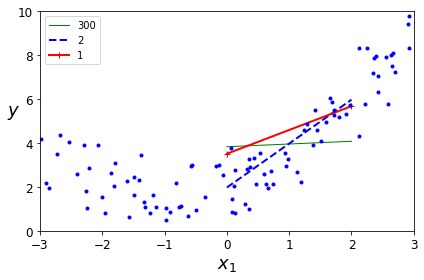

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x_new)
    plt.plot(x_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(x, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show() 

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              #

Saving figure underfitting_learning_curves_plot


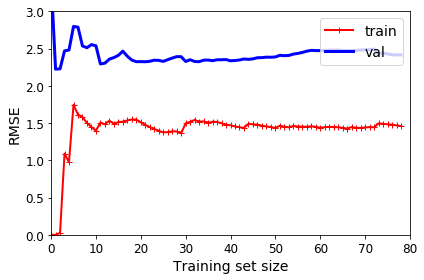

In [47]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()  

These	learning	curves	are	typical	of	an	underfitting	model.	Both	curves	have	reached	a	plateau;	they	are close	and	fairly	high.


If	your	model	is	underfitting	the	training	data,	adding	more	training	examples	will	not	help.	You	need	to	use	a	more	complex model	or	come	up	with	better	features.

Saving figure learning_curves_plot


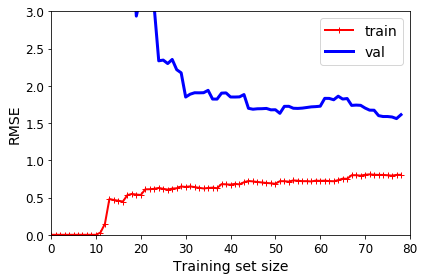

In [48]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, x, y)
plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot")  
plt.show()        

The	error	on	the	training	data	is	much	lower	than	with	the	Linear	Regression	model. There	is	a	gap	between	the	curves.	This	means	that	the	model	performs	significantly	better	on	the training	data	than	on	the	validation	data,	which	is	the	hallmark	of	an	overfitting	model.	However,	if you	used	a	much	larger	training	set,	the	two	curves	would	continue	to	get	closer.

''One	way	to	improve	an	overfitting	model	is	to	feed	it	more	training	data	until	the	validation	error	reaches	the	training	error.''


# THE	BIAS/VARIANCE	TRADEOFF 

An	important	theoretical	result	of	statistics	and	Machine	Learning	is	the	fact	that	a	model’s	generalization	error	can	be	expressed	as	the sum	of	three	very	different	errors: 

BIAS:
This	part	of	the	generalization	error	is	due	to	wrong	assumptions,	such	as	assuming	that	the	data	is	linear	when	it	is	actually quadratic.	A	high-bias	model	is	most	likely	to	underfit	the	training	data.10 

VARIANCE:
     This	part	is	due	to	the	model’s	excessive	sensitivity	to	small	variations	in	the	training	data.	A	model	with	many	degrees	of	freedom (such	as	a	high-degree	polynomial	model)	is	likely	to	have	high	variance,	and	thus	to	overfit	the	training	data.

IRREDUCIBLE ERROR: This	part	is	due	to	the	noisiness	of	the	data	itself.	The	only	way	to	reduce	this	part	of	the	error	is	to	clean	up	the	data	(e.g.,	fix	the data	sources,	such	as	broken	sensors,	or	detect	and	remove	outliers). 

"Increasing	a	model’s	complexity	will	typically	increase	its	variance	and	reduce	its	bias.	Conversely,	reducing	a	model’s	complexity increases	its	bias	and	reduces	its	variance.	This	is	why	it	is	called	a	tradeoff."

# Regularized	Linear	Models 

a	good	way	to	reduce	overfitting	is	to	regularize	the	model	(i.e.,	to constrain	it):	the	fewer	degrees	of	freedom	it	has,	the	harder	it	will	be	for	it	to	overfit	the	data.	For example,	a	simple	way	to	regularize	a	polynomial	model	is	to	reduce	the	number	of	polynomial	degrees.

For	a	linear	model,	regularization	is	typically	achieved	by	constraining	the	weights	of	the	model.	We	will now	look	at	Ridge	Regression,	Lasso	Regression,	and	Elastic	Net,	which	implement	three	different	ways to	constrain	the	weights.

# Ridge	Regression 

Ridge	Regression	(also	called	Tikhonov	regularization)	is	a	regularized	version	of	Linear	Regression:	a regularization	term	equal	to	sigma(thetai)**2	is	added	to	the	cost	function.	This	forces	the	learning	algorithm	to not	only	fit	the	data	but	also	keep	the	model	weights	as	small	as	possible.	Note	that	the	regularization	term should	only	be	added	to	the	cost	function	during	training.	Once	the	model	is	trained,	you	want	to	evaluate the	model’s	performance	using	the	unregularized	performance	measure.


It	is	quite	common	for	the	cost	function	used	during	training	to	be	different	from	the	performance	measure	used	for	testing.	Apart from	regularization,	another	reason	why	they	might	be	different	is	that	a	good	training	cost	function	should	have	optimizationfriendly	derivatives,	while	the	performance	measure	used	for	testing	should	be	as	close	as	possible	to	the	final	objective.	A	good example	of	this	is	a	classifier	trained	using	a	cost	function	such	as	the	log	loss	(discussed	in	a	moment)	but	evaluated	using precision/recall.


J(THETA)=MSE(THETA)+(ALPHA)/2*(SIGMA[(THETAi)**2]

The	hyperparameter	α	controls	how	much	you	want	to	regularize	the	model.	If	α	=	0	then	Ridge Regression	is	just	Linear	Regression.	If	α	is	very	large,	then	all	weights	end	up	very	close	to	zero	and	the result	is	a	flat	line	going	through	the	data’s	mean

"""It	is	important	to	scale	the	data	(e.g.,	using	a	StandardScaler)	before	performing	Ridge	Regression,	as	it	is	sensitive	to	the	scale of	the	input	features.	This	is	true	of	most	regularized	models."""


Saving figure ridge_regression_plot


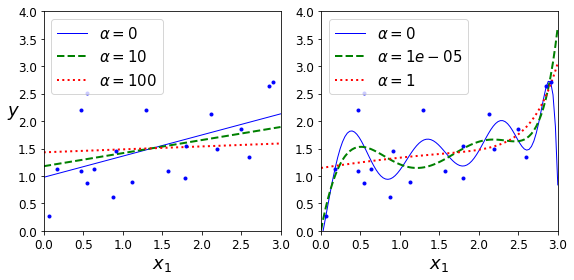

In [49]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x+ np.random.randn(m, 1) / 1.5
x_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(x, y)
        y_new_regul = model.predict(x_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(x_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(x, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

ridge regression closed form equation:
    (theta)^=inv[(xT*x+(alpha*A))] *xT*y

In [50]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [51]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

The	penalty	hyperparameter	sets	the	type	of	regularization	term	to	use.	Specifying	"l2"	indicates	that you	want	SGD	to	add	a	regularization	term	to	the	cost	function	equal	to	half	the	square	of	the	ℓ2	norm	of the	weight	vector:	this	is	simply	Ridge	Regression.

# LASSO REGRESSION

Least	Absolute	Shrinkage	and	Selection	Operator	Regression	(simply	called	Lasso	Regression)	is another	regularized	version	of	Linear	Regression:	just	like	Ridge	Regression,	it	adds	a	regularization	term to	the	cost	function,	but	it	uses	the	ℓ1	norm	of	the	weight	vector	instead	of	half	the	square	of	the	ℓ2	norm.


J(THETA)=MSE(THETA)+(ALPHA)SIGMA(|THETAi|)

Saving figure lasso_regression_plot


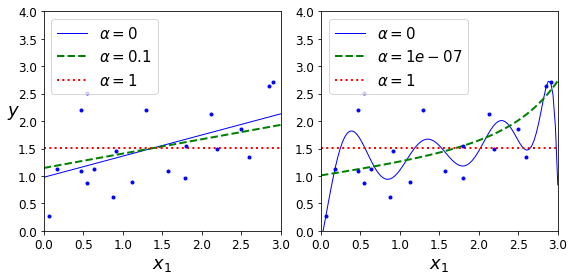

In [52]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [53]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

On	the	Lasso	cost	function,	the	BGD	path	tends	to	bounce	across	the	gutter	toward	the	end.	This	is	because	the	slope	changes abruptly	at	θ2	=	0.	You	need	to	gradually	reduce	the	learning	rate	in	order	to	actually	converge	to	the	global	minimum.


In [54]:
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l1", random_state=42)
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49903849])

# ELASTIC NET

Elastic	Net	is	a	middle	ground	between	Ridge	Regression	and	Lasso	Regression.	The	regularization	term is	a	simple	mix	of	both	Ridge	and	Lasso’s	regularization	terms,	and	you	can	control	the	mix	ratio	r.	When r	=	0,	Elastic	Net	is	equivalent	to	Ridge	Regression,	and	when	r	=	1,	it	is	equivalent	to	Lasso	Regression .


J(THETA)=MSE(THETA)+r.(alpha)sigma[|thetai|] + ((1-r)/2).sigma(thetai)**2

In [55]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([1.54333232])

# Early	Stopping 

A	very	different	way	to	regularize	iterative	learning	algorithms	such	as	Gradient	Descent	is	to	stop training	as	soon	as	the	validation	error	reaches	a	minimum.	This	is	called	early	stopping.	

Saving figure early_stopping_plot


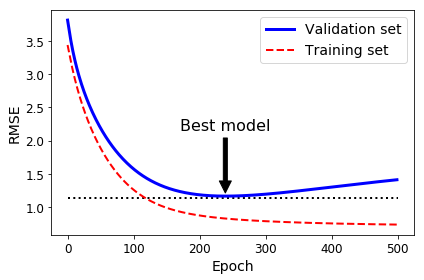

In [56]:
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 2 + x + 0.5 * x**2 + np.random.randn(m, 1)

x_train, x_val, y_train, y_val = train_test_split(x[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(x_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(x_train_poly_scaled)
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

a	complex	model	(in	this	case	a	high-degree	Polynomial	Regression	model)	being	trained	using Batch	Gradient	Descent.	As	the	epochs	go	by,	the	algorithm	learns	and	its	prediction	error	(RMSE)	on	the training	set	naturally	goes	down,	and	so	does	its	prediction	error	on	the	validation	set.	However,	after	a while	the	validation	error	stops	decreasing	and	actually	starts	to	go	back	up.	This	indicates	that	the	model has	started	to	overfit	the	training	data.	With	early	stopping	you	just	stop	training	as	soon	as	the	validation error	reaches	the	minimum.	It	is	such	a	simple	and	efficient	regularization	technique	that	Geoffrey	Hinton called	it	a	“beautiful	free	lunch.”


With	Stochastic	and	Mini-batch	Gradient	Descent,	the	curves	are	not	so	smooth,	and	it	may	be	hard	to	know	whether	you	have reached	the	minimum	or	not.	One	solution	is	to	stop	only	after	the	validation	error	has	been	above	the	minimum	for	some	time (when	you	are	confident	that	the	model	will	not	do	any	better),	then	roll	back	the	model	parameters	to	the	point	where	the validation	error	was	at	a	minimum.

In [57]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [58]:
best_epoch

239

In [59]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=1,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=True)

# Logistic	Regression 

some	regression	algorithms	can	be	used	for	classification	as	well	(and vice	versa).	Logistic	Regression	(also	called	Logit	Regression)	is	commonly	used	to	estimate	the probability	that	an	instance	belongs	to	a	particular	class	(e.g.,	what	is	the	probability	that	this	email	is spam?).	If	the	estimated	probability	is	greater	than	50%,	then	the	model	predicts	that	the	instance	belongs to	that	class	(called	the	positive	class,	labeled	“1”),	or	else	it	predicts	that	it	does	not	(i.e.,	it	belongs	to the	negative	class,	labeled	“0”).	This	makes	it	a	binary	classifier.

# Estimating	Probabilities

Just	like	a	Linear	Regression	model,	a	Logistic	Regression	model	computes	a weighted	sum	of	the	input	features	(plus	a	bias	term),	but	instead	of	outputting	the	result	directly	like	the Linear	Regression	model	does,	it	outputs	the	logistic	of	this	result

Logistic	Regression	model	estimated	probability	(vectorized	form):
P^=h0(x)=logit(theta)T.X
logit or sigmoid function(t)=1/(1+exp(-t))


Saving figure logistic_function_plot


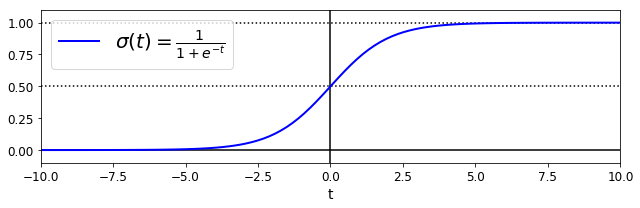

In [60]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

# Training	and	Cost	Function 

The	objective	of	training	is	to	set	the	parameter	vector	θ	so	that	the	model	estimates high	probabilities	for	positive	instances	(y	=	1)	and	low	probabilities	for	negative	instances	(y	=	0).	This idea	is	captured	by	the	cost	function	for	a	single	training	instance	x.


cost function for single training instance:
    
    

c(theta)=-log(p^) if y=1

c(theta)= -log(1-p^) if y=0

The	cost	function	over	the	whole	training	set	is	simply	the	average	cost	over	all	training	instances.	It	can be	written	in	a	single	expression	(as	you	can	verify	easily),	called	"the	log	loss"

J(theta)=(-1/m) sigma[(yi(log(p^i)))+(1-yi)log(1-p^i)]

.	Logistic	cost	function	partial	derivatives

partial derivation(J(theta))=(1/m) sigma([(logit).(theta T.xi)- yi].xj)

for	each	instance	it	computes	the	prediction	error	and multiplies	it	by	the	jth	feature	value,	and	then	it	computes	the	average	over	all	training	instances.	Once	you have	the	gradient	vector	containing	all	the	partial	derivatives	you	can	use	it	in	the	Batch	Gradient	Descent algorithm.	That’s	it:	you	now	know	how	to	train	a	Logistic	Regression	model.	For	Stochastic	GD	you would	of	course	just	take	one	instance	at	a	time,	and	for	Mini-batch	GD	you	would	use	a	mini-batch	at	a time.

In [61]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [62]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [63]:
x=iris['data'][:,3:]

In [64]:
y=(iris['target']==2).astype(np.int)# 1 if iris-viriginca else o

In [65]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='sag')
log_reg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

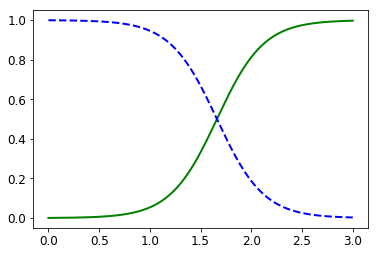

In [66]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)

plt.plot(x_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(x_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

Saving figure logistic_regression_plot


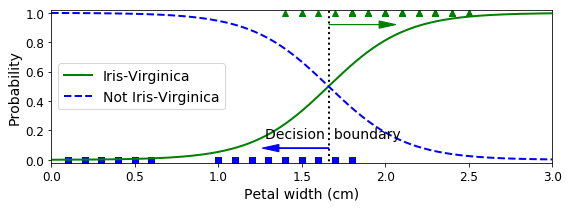

In [67]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
decision_boundary = x_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(x[y==0], y[y==0], "bs")
plt.plot(x[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(x_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(x_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [68]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [69]:
decision_boundary

array([1.66366366])

Saving figure logistic_regression_contour_plot


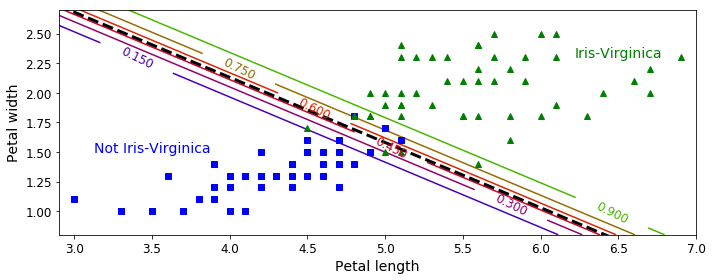

In [70]:
from sklearn.linear_model import LogisticRegression

x= iris["data"] [:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(x, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
x_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(x_new)

plt.figure(figsize=(10, 4))
plt.plot(x[y==0, 0], x[y==0, 1], "bs")
plt.plot(x[y==1, 0], x[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

the	same	dataset	but	this	time	displaying	two	features:	petal	width	and	length.	Once trained,	the	Logistic	Regression	classifier	can	estimate	the	probability	that	a	new	flower	is	an	IrisVirginica	based	on	these	two	features.	The	dashed	line	represents	the	points	where	the	model	estimates	a 50%	probability:	this	is	the	model’s	decision	boundary.	Note	that	it	is	a	linear	boundary.17	Each	parallel line	represents	the	points	where	the	model	outputs	a	specific	probability,	from	15%	(bottom	left)	to	90% (top	right).	All	the	flowers	beyond	the	top-right	line	have	an	over	90%	chance	of	being	Iris-Virginica according	to	the	model.

Just	like	the	other	linear	models,	Logistic	Regression	models	can	be	regularized	using	ℓ1	or	ℓ2	penalties. Scitkit-Learn	actually	adds	an	ℓ2	penalty	by	default.


The	hyperparameter	controlling	the	regularization	strength	of	a	Scikit-Learn	LogisticRegression	model	is	not	alpha	(as	in	other linear	models),	but	its	inverse:	C.	The	higher	the	value	of	C,	the	less	the	model	is	regularized.

# Softmax	Regression 

The	Logistic	Regression	model	can	be	generalized	to	support	multiple	classes	directly,	without	having	to train	and	combine	multiple	binary	classifiers	(as	discussed	in	Chapter	3).	This	is	called	Softmax Regression,	or	Multinomial	Logistic	Regression

The	idea	is	quite	simple:	when	given	an	instance	x,	the	Softmax	Regression	model	first	computes	a	score sk(x)	for	each	class	k,	then	estimates	the	probability	of	each	class	by	applying	the	softmax	function	(also called	the	normalized	exponential)	to	the	scores.	The	equation	to	compute	sk(x)	should	look	familiar,	as it	is	just	like	the	equation	for	Linear	Regression	prediction

Softmax	score	for	class	k:


S(k)=(THETA K)T . X

Once	you	have	computed	the	score	of	every	class	for	the	instance	x,	you	can	estimate	the	probability	k that	the	instance	belongs	to	class	k	by	running	the	scores	through	the	softmax	function ABOVE Equation:	it computes	the	exponential	of	every	score,	then	normalizes	them	(dividing	by	the	sum	of	all	the exponentials).

Softmax	function:


P^k=exp(Sk(X))/SIGMA(exp(Sj(X)))

Just	like	the	Logistic	Regression	classifier,	the	Softmax	Regression	classifier	predicts	the	class	with	the highest	estimated	probability	(which	is	simply	the	class	with	the	highest	score)

""""The	Softmax	Regression	classifier	predicts	only	one	class	at	a	time	(i.e.,	it	is	multiclass,	not	multioutput)	so	it	should	be	used	only with	mutually	exclusive	classes	such	as	different	types	of	plants.	You	cannot	use	it	to	recognize	multiple	people	in	one	picture.""""


Now	that	you	know	how	the	model	estimates	probabilities	and	makes	predictions,	let’s	take	a	look	at training.	The	objective	is	to	have	a	model	that	estimates	a	high	probability	for	the	target	class	(and consequently	a	low	probability	for	the	other	classes).	Minimizing	the	cost	function	shown	in	called	the	""cross	entropy"",	should	lead	to	this	objective	because	it	penalizes	the	model	when	it estimates	a	low	probability	for	a	target	class.	Cross	entropy	is	frequently	used	to	measure	how	well	a	set of	estimated	class	probabilities	match	the	target	classes

"""Cross	entropy	originated	from	information	theory.	Suppose	you	want	to	efficiently	transmit	information	about	the	weather	every	day.	If there	are	eight	options	(sunny,	rainy,	etc.),	you	could	encode	each	option	using	3	bits	since	23	=	8.	However,	if	you	think	it	will	be	sunny almost	every	day,	it	would	be	much	more	efficient	to	code	“sunny”	on	just	one	bit	(0)	and	the	other	seven	options	on	4	bits	(starting	with a	1).	Cross	entropy	measures	the	average	number	of	bits	you	actually	send	per	option.	If	your	assumption	about	the	weather	is	perfect, cross	entropy	will	just	be	equal	to	the	entropy	of	the	weather	itself	(i.e.,	its	intrinsic	unpredictability).	But	if	your	assumptions	are	wrong (e.g.,	if	it	rains	often),	cross	entropy	will	be	greater	by	an	amount	called	the	Kullback–Leibler	divergence.
The	cross	entropy	between	two	probability	distributions	p	and	q	is	defined	as	h(p,q)=-sigma(p(x)log(q(x))	(at	least when	the	distributions	are	discrete)."""


In [71]:
x = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(x, y)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
softmax_reg.predict([[5,2]])

array([2])

In [73]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Saving figure softmax_regression_contour_plot


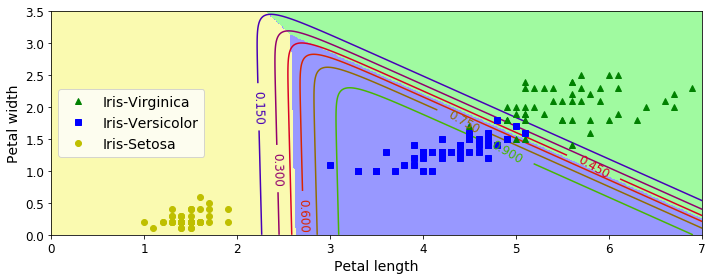

In [74]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
x_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(x_new)
y_predict = softmax_reg.predict(x_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(x[y==2, 0], x[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(x[y==1, 0], x[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(x[y==0, 0], x[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

# Batch Gradient Descent with early stopping for Softmax Regression

In [89]:
x=iris['data'][:,(2,3)] #petal length, petal width

In [91]:
y=iris['target']

In [94]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [95]:
np.random.seed(2042)

In [98]:
x_with_bias = np.c_[np.ones([len(x), 1]), x]

In [104]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(x_with_bias)

In [105]:
test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

In [106]:
test_size

30

In [107]:
validation_size

30

In [108]:
train_size

90

In [109]:
rnd_indices=np.random.permutation(total_size)

In [117]:
x_train=x_with_bias[rnd_indices[:train_size]]

In [118]:
x_train.shape

(90, 3)

In [119]:
y_train=y[rnd_indices[:train_size]]

In [120]:
y_train.shape

(90,)

In [121]:
x_val=x_with_bias[rnd_indices[train_size:-test_size]]

In [122]:
x_val.shape

(30, 3)

In [123]:
y_val=y[rnd_indices[train_size:-test_size]]

In [124]:
y_val.shape

(30,)

In [127]:
x_test=x_with_bias[rnd_indices[-test_size:]]

In [128]:
x_test.shape

(30, 3)

In [129]:
y_test=y[rnd_indices[-test_size:]]

In [130]:
y_test.shape

(30,)

In [138]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [135]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    y_one_hot = np.zeros((m, n_classes))
    y_one_hot[np.arange(m), y] = 1
    return y_one_hot

In [137]:
to_one_hot(y_train)[:10]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [140]:
y_train_one_hot = to_one_hot(y_train)
y_val_one_hot = to_one_hot(y_val)
y_test_one_hot = to_one_hot(y_test)

In [142]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [143]:
n_inputs = x_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

In [144]:
n_inputs

3

In [145]:
n_outputs

3

In [147]:
eta = 0.01#learning rate
n_iterations = 5001
m = len(x_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = x_train.dot(Theta)
    y_proba = softmax(logits) 
    loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
    error = y_proba - y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * x_train.T.dot(error)
    Theta = Theta - eta * gradients

0 6.101695333134016
500 0.7495955964003087
1000 0.6335867601044719
1500 0.5627809964824694
2000 0.5154218410707394
2500 0.48116101400112515
3000 0.45483325048430245
3500 0.4336617868483096
4000 0.4160434121580319
4500 0.40099310107809877
5000 0.38787288168306755


In [163]:
Theta

array([[ 3.65330841, -0.24793232, -5.10564724],
       [-1.06655258,  0.14847067,  0.91808191],
       [-0.42982606, -0.13175581,  0.56158187]])

In [164]:
logits = x_val.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

1.0

In [165]:
eta = 0.1
n_iterations = 5001
m = len(x_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = x_train.dot(Theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = y_proba - y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * x_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 4.389185406058857
500 0.53836117830737
1000 0.5050554328025819
1500 0.49520279539877454
2000 0.4915027487832054
2500 0.48998629702997054
3000 0.48933698274242343
3500 0.4890519457995903
4000 0.48892490834158653
4500 0.48886774370206165
5000 0.48884186032134624


In [166]:
logits = x_val.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

1.0

In [157]:
eta = 0.1 
n_iterations = 5001
m = len(x_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = x_train.dot(Theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = y_proba - y_train_one_hot
    gradients = 1/m * x_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = x_val.dot(Theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_val_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 2.640033660350405
500 0.5603771552870109
1000 0.5401925361936724
1500 0.5345447783544128
2000 0.5329082107725354
2500 0.5325545024066124
2614 0.5325466937764207
2615 0.5325466948333359 early stopping!


In [159]:
logits = x_val.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

1.0

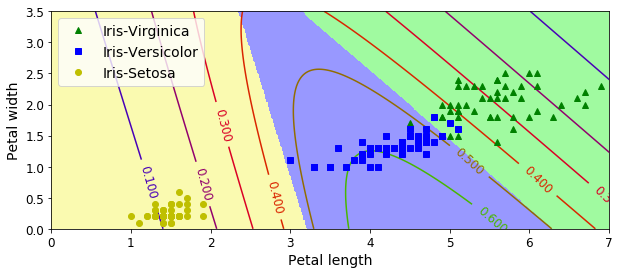

In [161]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
x_new = np.c_[x0.ravel(), x1.ravel()]
x_new_with_bias = np.c_[np.ones([len(x_new), 1]), x_new]

logits = x_new_with_bias.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(x[y==2, 0], x[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(x[y==1, 0], x[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(x[y==0, 0], x[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [162]:
logits = x_test.dot(Theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333